# Thyroid Disease Data Set (Perceptron)
## Trabalho Prático IA EIM 2019/2020
#### Luís Pereira    @a14868 <br> Ricardo Carvas @a14812

#### Orientador Científico: Nuno Dias
#### IPCA
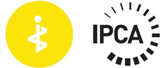

# Introdução 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A inteligência artificial é uma das áreas de estudo com mais crescimento nos últimos anos dentro do universo das ciências da computação. Existem várias técnicas de implementação e aplicação de IA e neste trabalho iremos abordar e implementar uma das mais utilizadas, o Machine Learning.
   <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Machine learning é uma aplicação de IA que fornece a habilidade ao sistema de aprender e melhorar com experiência naquilo que aprendeu. O Machine Learning foca-se no desenvolvimento de software capaz de aceder a dados e usar esses dados para aprender num processo automatizado. Neste trabalho foi implementado um classificador Perceptron, classificador este que incorpora as técnicas de Supervised Learning dentro do Machine Learning. 
   <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   O classificador Perceptron foi então utilizado para prever a existência de hipotiroidismo com base em dados de vários atributos que lhe foram fornecidos para treino. 
   <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Neste relatório iremos responder às questões propostas e juntamente irá estar um notebook onde todo o código foi desenvolvido bem como referência a bibliotecas e métodos utilizados.


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron 
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.metrics import accuracy_score
import sys
!{sys.executable} -m pip install mlxtend  
from mlxtend.plotting import plot_confusion_matrix




# Leitura do dataset

## from : pandas

###### https://pandas.pydata.org/

*Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language*

In [2]:
dataset=pd.read_csv("hypothyroid.data.txt", sep=',')

with open('hypothyroid.names2.txt') as my_file:
    colunas = list(my_file)

colunas = [x.replace('\n', '') for x in colunas]
colunas = [x.replace('\t', '') for x in colunas]
colunas = [x.replace(' ', '') for x in colunas]

print(colunas)

dataset.columns = colunas

display(dataset)


['hypothyroid', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured:', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']


,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured:,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,y,1.10,y,27,y,1.19,y,23,n,?
5,hypothyroid,64,F,f,f,f,t,f,f,f,...,y,1.30,y,54,y,0.86,y,63,n,?
6,hypothyroid,72,F,f,f,f,f,f,f,f,...,y,1.90,y,34,y,1.05,y,32,n,?
7,hypothyroid,20,F,f,f,f,f,t,f,f,...,n,?,y,39,y,1.21,y,32,n,?
8,hypothyroid,42,F,f,f,f,f,f,f,f,...,n,?,y,7.60,y,1.02,y,7.50,n,?
9,hypothyroid,69,F,f,f,f,f,f,f,f,...,y,0.80,y,53,y,0.86,y,61,n,?


# Pergunta 1: <br>Descreva sucintamente o dataset utilizado e indique os atributos que descrevem as suas instâncias, discriminando atributos preditores de atributo(s) target.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O dataset possui 3162 linhas e 26 colunas. As linhas correspondem aos pacientes do estudo e as colunas ao tipo de dados recolhidos (atributos).
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O atributo “hypothyroid” é o atributo target, ou seja, é o atributo que se pretende que o classificador adivinhe, com base nos outros atributos. Este atributo pode também ser chamado de label e neste dataset tem 2 valores possíveis, “hypothyroid” e “negative”.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Os restantes atributos são então os atributos que serão utilizados para treinar o classificador e podem ser chamados features. 
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Os features neste dataset correspondem a dados dos pacientes relevantes para o diagnóstico de doenças da tiroide tais como idade, sexo, cirurgias, gravidez medicamentos, análises, etc.
Os valores variam entre numerários e valores binários (Masculino e feminino, Verdadeiro e Falso, Sim e Não)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; M/F: Sex <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; T/F: On_tryroxine, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Y/N: TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured, TBG_measured<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Numérico: Age, TSH, T3, TT4, T4U, FTI, TBG<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Hypothyroid/negative: Hypothyroid 


# Pergunta 2: <br>Apresente estatísticas descritivas (média, desvio padrão, máximo, mínimo) dos vários atributos deste dataset.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A biblioteca pandas dispõem do método “describe()” capaz de nos fornecer estatísticas descritivas sobre um dado array de dados numéricos. Para os atributos numéricos esse método foi aplicado, para os restantes foi apenas contabilizado o número de ocorrências dos valores possíveis 

# Estatísticas descritivas dos atributos





In [3]:
#Para utilizar o método "describe()" do pandas é necessário substituir os valores perdidos "?" por nulls
dataset.replace(to_replace='?', value=np.nan, inplace=True)

#dataset.info()

print("\n")

for column in dataset:
    x=dataset[column]
    print(column)
    try:
        x=pd.to_numeric(x)
        display(x.describe())
    except:
        display(x.value_counts())
    
    



hypothyroid


negative       3012
hypothyroid     150
Name: hypothyroid, dtype: int64

age


count    2716.000000
mean       51.146539
std        19.293809
min         1.000000
25%        35.000000
50%        54.000000
75%        67.000000
max        98.000000
Name: age, dtype: float64

sex


F    2182
M     907
Name: sex, dtype: int64

on_thyroxine


f    2701
t     461
Name: on_thyroxine, dtype: int64

query_on_thyroxine


f    3107
t      55
Name: query_on_thyroxine, dtype: int64

on_antithyroid_medication


f    3120
t      42
Name: on_antithyroid_medication, dtype: int64

thyroid_surgery


f    3058
t     104
Name: thyroid_surgery, dtype: int64

query_hypothyroid


f    2921
t     241
Name: query_hypothyroid, dtype: int64

query_hyperthyroid


f    2919
t     243
Name: query_hyperthyroid, dtype: int64

pregnant


f    3099
t      63
Name: pregnant, dtype: int64

sick


f    3063
t      99
Name: sick, dtype: int64

tumor


f    3122
t      40
Name: tumor, dtype: int64

lithium


f    3160
t       2
Name: lithium, dtype: int64

goitre


f    3063
t      99
Name: goitre, dtype: int64

TSH_measured


y    2694
n     468
Name: TSH_measured, dtype: int64

TSH


count    2694.000000
mean        5.914243
std        23.899400
min         0.000000
25%         0.000000
50%         0.700000
75%         2.275000
max       530.000000
Name: TSH, dtype: float64

T3_measured:


y    2467
n     695
Name: T3_measured:, dtype: int64

T3


count    2467.000000
mean        1.940292
std         0.996610
min         0.000000
25%         1.400000
50%         1.800000
75%         2.300000
max        10.200000
Name: T3, dtype: float64

TT4_measured


y    2913
n     249
Name: TT4_measured, dtype: int64

TT4


count    2913.000000
mean      108.882218
std        45.459961
min         2.000000
25%        83.000000
50%       104.000000
75%       128.000000
max       450.000000
Name: TT4, dtype: float64

T4U_measured


y    2914
n     248
Name: T4U_measured, dtype: int64

T4U


count    2914.000000
mean        0.978027
std         0.226428
min         0.000000
25%         0.850000
50%         0.960000
75%         1.060000
max         2.210000
Name: T4U, dtype: float64

FTI_measured


y    2915
n     247
Name: FTI_measured, dtype: int64

FTI


count    2915.000000
mean      115.433928
std        60.218252
min         0.000000
25%        91.000000
50%       107.000000
75%       129.000000
max       881.000000
Name: FTI, dtype: float64

TBG_measured


n    2902
y     260
Name: TBG_measured, dtype: int64

TBG


count    260.000000
mean      31.283077
std       19.224659
min        0.000000
25%       21.000000
50%       28.000000
75%       34.000000
max      122.000000
Name: TBG, dtype: float64

# Pergunta 3: <br>	Explique o funcionamento de um perceptron, formas de redução de ruído, falta de generalização e sobretreino (overfitting).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Um Percetron é uma unidade de rede neuronal (um neurónio artificial) que realiza determinados cálculos para resolver problemas com os dados de entrada. O perceptron é um modelo matemático que recebe valores de características e lhes associa um peso, estes por sua vez produzem a saída de um resultado binário. Este algoritmo permite que os neurónios aprendam e processem elementos durante a etapa de treino.<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O processo de treino do perceptron é bastante simples. Consiste em mostrar ao perceptron um conjunto de exemplos que ele deve aprender. Cada exemplo tem uma saída esperada e um conjunto de métricas / características associadas a ela, conhecidas como atributos. Os atributos de cada exemplo são dados ao perceptron através dos nós de entrada, para que a saída prevista possa ser calculada com base nos pesos atribuidos aos atributos. Este processo é iterativo e é através da aprendizagem adquirida a cada iteração que os pesos são ajustados conforme as divergências entre a saída esperada  e a saída prevista.  
<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Existem dois tipos de Perceptrons: o Single Layer Perceptrons (camada única) e o Multi Layer Perceptrons (multicamada) e ambos têm funções de ativação diferentes.



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O Single Layer Perceptron pode aprender apenas padrões linearmente separáveis. Este tipo tem a seguinte função de ativação:
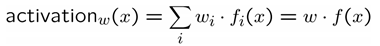
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O Multi Layer Perceptron tem maior poder de processamento. Este tipo apresenta uma função de ativação chamada de Sigmoid:
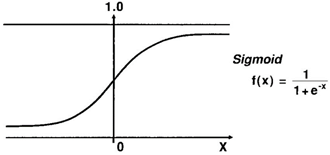
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O propósito final é que o perceptron consiga atribuir um resultado a uma amostra de dados e que seja o mais próximo possível do resultado real. Para isso foi implementado uma regra de aprendizagem do perceptron que é usada para ajustar os pesos a fim de ter maior precisão. No início os pesos são igualados a zero e para cada instância de treino classifica-se com pesos atuais. Se y= $ h_{w} \left( x \right)  $, isto é, a amostra é igual à previsão, nada se altera. Caso seja diferente têm de se ajustar os pesos.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Na utilização dos percetrons encontramos no caminho vários problemas. Um deles é o ruído em que se os dados não são separáveis, os pesos podem se tornar instáveis. Uma medida que pode solucionar a questão é o Averaging Perceptron que usa uma média de vetores de peso ao longo do tempo, em que o erro na separação vai ser mínimo. Outra medida utilizada é a Mira Infused Relaxed Algorithm (MIRA) que escolhe uma taxa de atualização que corrige os erros de instabilidade, minimizando as variações de w.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Outro problema encontrado no perceptrons é a generalização medíocre que abrange a separação mal feita dos dados. Para a solução deste problema podemos contar com a ajuda do Margin Infused Relaxed Algorithm (MIRA) e do Support Vector Machine (SVM). Os SVMs e o MIRA querem um vetor de peso que maximize a margem para 1. Então dispõe-se uma restrição no vetor de peso dizendo que este, quando calculado a norma, deve ser 1. Mantemos a margem fixa e minimizamos a norma, ou seja, queremos o menor vetor de peso que nos dá margem 1.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Um outro grande problema na utilização de percetrons é o overfitting. O overfitting se refere a um modelo em que os dados de treino são melhores que os dados de teste. Isto será um grande problema, visto que vai influenciar no desempenho do perceptron pois há um excesso de treinos. 
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Para este problema foram encontradas várias soluções. Uma dessas resoluções é com a introdução de mais dados que pode ajudar a detetar melhor o sinal e com esse aumento de dados evita-se que o perceptron sobrecarregue as amostras.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Uma segunda forma de resolver o problema é com a paragem mais cedo do processo. Isto significa que quando o perceptron a entra em overfitting é possível parar o processo evitando o problema.
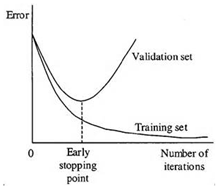
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Outra maneira de resolver o overfitting é usando um processo chamado regularização que se refere a um conjunto de técnicas que forçam o modelo a ser mais simples.


# Pergunta 4: <br>Desenvolva e aplique um classificador baseado em Perceptron (considerando apenas uma única camada) ao dataset, optimizando os seus parâmetros através do método MIRA nos dados de validação. Separe o dataset em dados de treino (70%), validação(20%) e teste (10%) e apresente a precisão alcançada pelo classificador nos dados de teste através de uma confusion matrix 
## (um bom classificador deve alcançar precisão superior a 92% neste dataset).

# Ajuste do DATASET

In [4]:
#O dataframe não deve conter strings nem nulls para o perceptron funcionar
dataset.replace(to_replace='M', value=1, inplace=True)
dataset.replace(to_replace='F', value=0, inplace=True)
dataset.replace(to_replace='y', value=1, inplace=True)
dataset.replace(to_replace='n', value=0, inplace=True)
dataset.replace(to_replace='t', value=1, inplace=True)
dataset.replace(to_replace='f', value=0, inplace=True)

#Os nulls serão substituidos com base no mêtodo do valor médio 

for column in dataset:
    x=dataset[column]
    try:
        x=pd.to_numeric(x)
        if(x.max()!=1):
            dataset[column].replace(to_replace=np.nan, value=x.mean(), inplace=True)
        else:dataset[column].replace(to_replace=np.nan, value=0.5, inplace=True)
    except:
        pass



dataset.isnull().sum()

hypothyroid                  0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured:                 0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [5]:
dataset

,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured:,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,15,0.0,1,0,0,0,0,0,0,...,1,1.70,1,19,1,1.13,1,17,0,31.2831
1,hypothyroid,24,1.0,0,0,0,0,0,0,0,...,1,0.20,1,4,1,1,1,0,0,31.2831
2,hypothyroid,24,0.0,0,0,0,0,0,0,0,...,1,0.40,1,6,1,1.04,1,6,0,31.2831
3,hypothyroid,77,1.0,0,0,0,0,0,0,0,...,1,1.20,1,57,1,1.28,1,44,0,31.2831
4,hypothyroid,85,0.0,0,0,0,0,1,0,0,...,1,1.10,1,27,1,1.19,1,23,0,31.2831
5,hypothyroid,64,0.0,0,0,0,1,0,0,0,...,1,1.30,1,54,1,0.86,1,63,0,31.2831
6,hypothyroid,72,0.0,0,0,0,0,0,0,0,...,1,1.90,1,34,1,1.05,1,32,0,31.2831
7,hypothyroid,20,0.0,0,0,0,0,1,0,0,...,0,1.94029,1,39,1,1.21,1,32,0,31.2831
8,hypothyroid,42,0.0,0,0,0,0,0,0,0,...,0,1.94029,1,7.60,1,1.02,1,7.50,0,31.2831
9,hypothyroid,69,0.0,0,0,0,0,0,0,0,...,1,0.80,1,53,1,0.86,1,61,0,31.2831


# Divisão do dataset em treino e teste

## from : sklearn.model_selection.train_test_split

###### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

*Split arrays or matrices into random train and test subsets*

In [6]:
X= dataset.drop('hypothyroid', 1)

Y=dataset["hypothyroid"]


#Dividir o dataset em 90% dados de treino e 10% em dados de teste
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=0)


print("Percentagem dados treino = {0:.2f}%".format(len(X_train.index)/len(dataset.index)*100 ))
print("Percentagem dados teste = {0:.2f}%".format(len(X_test.index)/len(dataset.index)*100 ))


Percentagem dados treino = 89.97%
Percentagem dados teste = 10.03%


# Normalização dos Dados

## from : sklearn.preprocessing.StandardScaler

###### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

*Standardize features by removing the mean and scaling to unit variance*

In [7]:
sc= StandardScaler()

sc.fit(X_train)

X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


# Executar o Perceptron 

## from : sklearn.linear_model.Perceptron

###### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

*The Perceptron is a simple classification algorithm suitable for large scale learning*




Para cumprir o requisito da distribuição de dados, 70%-> treino, 20%->validação, 10%-teste, temos de calcular 
 o equivalente a 20% dentro dos 90% reservados para treino.

Regra 3 simples

[0.9 - 1]    
[0.2 - x]

Esse valor é introduzido no parâmetro "*validation_fraction*"

*validation_fraction: float, default=0.1
<br>The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. 
<br>Only used if early_stopping is True.*

In [8]:
val_frac=0.2/0.9 


perceptron = Perceptron(n_iter_no_change=40,random_state=0,early_stopping=True, validation_fraction=val_frac)


perceptron.fit(X_train_std,Y_train)

Y_pred=perceptron.predict(X_test_std)

print("Perceptron accuracy: {0:.2f}%".
      format(accuracy_score(Y_test,Y_pred)*100))

Perceptron accuracy: 99.05%


## Confusion Matrix

## from : sklearn.metrics.confusion_matrix ; mlxtend.plotting.plot_confusion_matrix:

###### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
###### http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/

*Functions for generating confusion matrices*

[[ 11   1]
 [  2 303]]


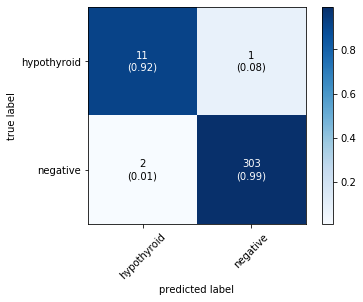

In [9]:
cm=confusion_matrix(Y_test,Y_pred) 
print(cm)




class_names = ['hypothyroid', 'negative']

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)


11 previsões hypothyroid corretas;
<br>2  previsões hypothyroid erradas;
<br>1  previsão  negativo errrada;
<br>303 previsões negativo corretas.

In [10]:
Corrected_predicts = sum(cm[i][i] for i in range(len(cm)))
All_predicts=cm.sum()
Accuracy=Corrected_predicts/All_predicts
print("Perceptron accuracy: {0:.2f}%".format(Accuracy*100))

Perceptron accuracy: 99.05%


# Pergunta 5: <br>Identifique e apresente metodologias de atualização de pesos alternativas ao algoritmo MIRA e compare-as.
<br>
<br>
<br>

# Support Vector Machine como alternativa ao MIRA

## from : sklearn.svm.LinearSVC

###### https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

*Linear Support Vector Classification*

In [11]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_std,Y_train)
y_predsvm = svclassifier.predict(X_test_std)
print("accuracy: {0:.2f}%".
      format(accuracy_score(Y_test,y_predsvm)*100))



accuracy: 98.74%


[[  9   3]
 [  1 304]]


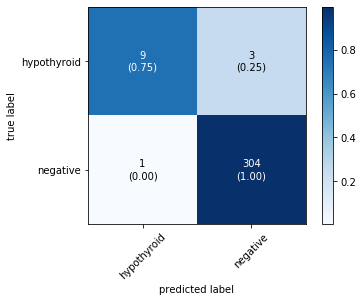

In [12]:
cmsvm=confusion_matrix(Y_test,y_predsvm) 
print(cmsvm)




class_names = ['hypothyroid', 'negative']

fig, ax = plot_confusion_matrix(conf_mat=cmsvm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)


Como a implementação do perceptron com optimização dos parametros com o método MIRA não foi conseguida, não é possível fazer comparação.
<br><br>
Contudo ao comparar com o perceptron implementado acima, podemos verificar que o SVM teve uma insignificante perda em relação ao accuracy score do perceptron. 

# Pergunta 6: <br>Explique o classificador utilizado no ponto 4 e compare-o com um multi-layer perceptron (MLP). Implemente o MLP a fim de poder comparar os seus resultados de precisão com os resultados anteriores.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Na pergunta 4 foi utilizado um Single Layer Perceptron (SLP) sendo este um algoritmo simples de classificação binária. Mas diferente de outros algoritmos de classificação, o perceptron foi modelado com base na unidade essencial do cérebro, o neurónio, que tem uma capacidade extraordinária de aprender e resolver problemas complexos.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O SLP recebe algumas entradas, cada uma com um peso atribuido aleatoriamente. Os pesos serão atualizados durante a fase de treino até o resultado ser o máximo espectável possível.O SLP apenas funciona em casos linearmente separáveis e com target binário.

| 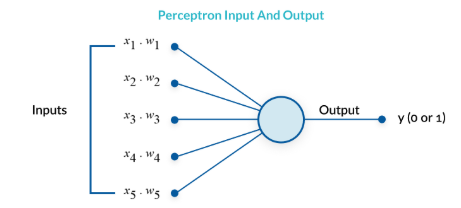 | 
|:--:| 
| *Input e output de um SLP* |

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O classificador Multi Layer Preceptron (MLP) é um perceptron empilhado por uma ou várias camadas escondidas para resolver problemas complexos. Um MLP consiste em pelo menos três camadas de nós: uma camada de entrada, uma camada oculta e uma camada de saída. Cada perceptron da camada de entrada comunica com os perceptrons da camada oculta e assim sucessivamente até à camada de saída. Todos os perceptrons enviam um sinal, cada um com pesos diferentes. A sua função de ativação é uma sigmoid.

| 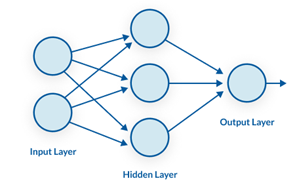 | 
|:--:| 
| *Input e output de um MLP* |

# Multi-layer Perceptron

## from : sklearn.neural_network.MLPClassifier¶

###### https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

O MLP (Multi-layer Perceptron) foi implementado com o mesmo numero de iterações e percentagem de dados para validação que o SLP (Single-Layer Perceptron)

Neste MLP estamos a usar as configurações default para a função de activação (*activation=relu*) e método de otimização dos pesos (*solver=adam*)

*relu -> "the rectified linear unit function, returns f(x) = max(0, x)"
<br>adam -> refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba*

In [13]:
mlp= MLPClassifier(n_iter_no_change=40,random_state=0,early_stopping=True, validation_fraction=val_frac)  


mlp.fit(X_train_std,Y_train)

Y_predmlp=mlp.predict(X_test_std)

print("accuracy: {0:.2f}%".
      format(accuracy_score(Y_test,Y_predmlp)*100))



accuracy: 98.11%


Aqui podemos perceber que neste problema, o SLP tem uma melhor eficácia sobre o MLP nestas configurações.
<br><br>
Contudo, na pergunta 8 abaixo, podemos perceber que a configuração MLP com activation = identity e solver = lbfgs atinge o mesmo accuracy score que o SLP

# Pergunta 7: <br>Para o modelo de classificação desenvolvido, identifique e apresente o ranking dos atributos por ordem decrescente do peso no classificador.

# Pesos dos atributos 

## from : sklearn.linear_model.Perceptron

###### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


*coef_ : ndarray of shape = [1, n_features] if n_classes == 2 else [n_classes, n_features]*
<br>*Weights assigned to the features.*

Como o dataset apenas apresenta uma decisão binária (hypothyroid ou negative), não é possível diferenciar os pesos por label



In [14]:
atributos=colunas

try:
    atributos.remove("hypothyroid")
except:
    pass


dic_p=dict(zip(atributos,perceptron.coef_[0]))


pesosP_rank=dict(sorted(dic_p.items(), key = lambda x: float(x[1]), reverse  = True))


print("Rank pesos Perceptron:")
display(pesosP_rank)


Rank pesos Perceptron:


{'lithium': 36.509239262549414,
 'FTI': 27.257454094704055,
 'tumor': 3.7389937106918096,
 'TT4': 3.402072326984061,
 'sick': 3.11278870449868,
 'on_antithyroid_medication': 3.000334205983311,
 'query_hyperthyroid': 1.9814775866697216,
 'query_hypothyroid': 1.7865633001826624,
 'pregnant': 1.4578760250694445,
 'query_on_thyroxine': 1.457876025069444,
 'sex': 1.2418620228057478,
 'TBG': 0.5582159077749562,
 'TBG_measured': 0.548434482137439,
 'T3_measured:': 0.059598755007169046,
 'TT4_measured': -1.2790076133539918,
 'T4U_measured': -1.2790076133539918,
 'FTI_measured': -1.341514341865837,
 'T4U': -1.5620493012003296,
 'goitre': -1.5993257616756076,
 'on_thyroxine': -1.8356567642746318,
 'T3': -1.9958856416880204,
 'thyroid_surgery': -3.0581106738733874,
 'age': -3.4134034034790766,
 'TSH': -5.461180219749632,
 'TSH_measured': -14.684788197936726}

# Pergunta 8: <br>Identifique, implemente e compare pelo menos 2 classificadores alternativos baseados em MLP e explique o que entende por Deep Learning.

# Alternativas MLP 

O classificador MLPClassifier da biblioteca scikit-learn dispõem algumas opções de configuração, nomeadamente ao nivel da função de activação (*activation*) e método de otimização dos pesos (*solver*).



## from sklearn.neural_network.MLPClassifier 

###### https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

*activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
<br>Activation function for the hidden layer.
<br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
<br>
<br>solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
<br>The solver for weight optimization.
<br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;‘sgd’ refers to stochastic gradient descent.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
<br>
<br>Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.*

In [15]:
act_list=["identity", "logistic", "tanh", "relu"]
solv_list=["lbfgs", "sgd", "adam"]

list1=[]
for act in act_list:
    for solv in solv_list:
        
        mlp= MLPClassifier(activation=act,solver=solv, n_iter_no_change=40,random_state=0,early_stopping=True, validation_fraction=val_frac)  
        
        mlp.fit(X_train_std,Y_train)
        
        Y_predmlp=mlp.predict(X_test_std)
        
        list1.append([act,solv,accuracy_score(Y_test,Y_predmlp)*100])
        



list1=sorted(list1, key=lambda x:(x[2]), reverse=True)

print("RANKING DAS CONFIGURAÇÕES COM MELHOR PRECISÃO")

for x in list1:
    print("MLP com activation =",x[0],"e solver =",x[1],"teve precisão de= {0:.2f}%".
              format(x[2]))

RANKING DAS CONFIGURAÇÕES COM MELHOR PRECISÃO
MLP com activation = identity e solver = lbfgs teve precisão de= 99.05%
MLP com activation = logistic e solver = adam teve precisão de= 98.74%
MLP com activation = relu e solver = lbfgs teve precisão de= 98.74%
MLP com activation = identity e solver = sgd teve precisão de= 98.42%
MLP com activation = identity e solver = adam teve precisão de= 98.42%
MLP com activation = tanh e solver = lbfgs teve precisão de= 98.42%
MLP com activation = tanh e solver = adam teve precisão de= 98.42%
MLP com activation = logistic e solver = lbfgs teve precisão de= 98.11%
MLP com activation = tanh e solver = sgd teve precisão de= 98.11%
MLP com activation = relu e solver = sgd teve precisão de= 98.11%
MLP com activation = relu e solver = adam teve precisão de= 98.11%
MLP com activation = logistic e solver = sgd teve precisão de= 96.21%


Podemos verificar que para alguns MLP com configurações diferentes a pontuação de precisão é a mesma.

Os únicos MLP's com score único foram o MLP(activation = identity e solve = lbfgs) e MLP(activation = logistic e solver = sgd) que foram, respetivamente, o mais preciso e o menos preciso. 


## Deep Learning

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O Deep Learning é uma forma de Machine Learning na qual o modelo que está a ser treinado possui mais de uma camada oculta entre a entrada e a saída. Na maioria das discussões, Deep Learning significa usar redes neuronais profundas. Existem, no entanto, alguns algoritmos que implementam Deep Learning usando outros tipos de camadas ocultas além das redes neuronais.
As idéias para redes neuronais artificiais remontam à década de 1940. O conceito essencial é que uma rede de neurônios artificiais construídos a partir de interruptores threshold interligados possam prender a reconhecer padrões da mesma maneira que um  humano.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O Deep Learning evoluiu de forma significativa com a era digital, que causou um enorme aparecimento de dados em todas as regiões do mundo. Estes dados são extraídos de várias fontes como as redes socias, pesquisas na internet, no comércio eletrónico, entre outros. Esta enorme quantidade de dados pode ser facilmente partilhada através de aplicações. As empresas percebem o potencial destas informações e estão cada vez mais adaptando aos sistemas de inteligência artificial para o suporte automatizado.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O Deep Learning é usado nas indústrias, desde a condução autónoma até aos aparelhos médicos. Por exemplo na condução autónoma é usado para detetar todos os pontos de foco que um condutor humano deve ter (sinais, pioes, outros carros, linhas, etc.


# Conclusão

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A Inteligência Artificial é, sem dúvida,  o mais alto sinónimo da evolução humana e tecnológica. As aplicabilidades desta área são infinitas e por vezes, ainda bem longe da imaginação do Homem.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Com este trabalho experienciamos a implementação de um simples classificador "inteligente" e com isso, fomos capazes de aprofundar melhor os conhecimentos teóricos expostos em aula, bem como adquirir novos conhecimentos com base na procura de soluções naquilo que foram os problemas e conflitos na realização do mesmo. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Quanto à programação, enquanto alunos, achámos de extrema importância a proposta à realização de um projeto numa linguagem na qual ainda não nos sentimos 100% à vontade, pois sem dúvida será uma mais valia num futuro onde nem sempre iremos estar 100% confortáveis com o nosso ambiente e redor. 

